In [ ]:
# Python : 3.10.16
# Created: Apr. 14. 2025
# Author: Jinu Cho
# Description: AI-HUB 데이터셋 전처리 및 EDA
#
# 출처 : https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=&topMenu=&aihubDataSe=data&dataSetSn=71748

# AI-HUB 데이터셋 전처리

## 1. Other 데이터셋 전처리

In [1]:
import zipfile
import json
from tqdm import tqdm

other_qa_datas = []

with zipfile.ZipFile("./ai_hub_dataset/dataset/data/Other/Other.zip", "r") as zip_ref:
    file_list = zip_ref.namelist()
    for file in tqdm(file_list[:118], desc="data collecting"):
        with zip_ref.open(file) as f:
            data_list = json.load(f)
            qa_data = []
            for data in data_list:
                qa = data["contents"][0]["QA"]
                category = data["data_category"]["middle"]
                [q.update({"category": category}) for q in qa]
                qa_data.extend(qa)
            other_qa_datas.extend(qa_data)

data collecting: 100%|██████████| 118/118 [00:29<00:00,  3.94it/s]


In [2]:
print(len(other_qa_datas))
other_qa_datas[:10]

978172


[{'question': '도시개발실장이 감사회의에서 선서하는 내용은 무엇인가요?',
  'answer': '도시개발실장은 감사회의에서 선서할 때, 지방자치법과 부산광역시 의회 관련 조례에 따라 2009년도 행정사무감사를 성실히 받을 것이며, 증언할 때 양심에 따라 사실대로 말하고 거짓이 있다면 위증의 벌을 받기로 서약합니다. 이 내용은 감사회의 참석자들에게 성실함과 진심으로 감사에 임할 것을 약속하는 의미를 가지고 있습니다.',
  'category': '인문'},
 {'question': '감사회의에서 선서를 하지 않거나 거부할 경우 어떤 처벌을 받을 수 있는가요?',
  'answer': '감사회의에서 선서를 이유 없이 하지 않거나 거부할 경우, 관련 규정에 따라 처벌을 받을 수 있습니다. 또한 위증의 경우에는 고발될 수 있음을 알려드립니다. 따라서 감사회의 참석자들은 선서에 신중하게 대해야하며, 거부할 경우에는 엄중한 처벌을 받을 수 있음을 인지해야 합니다.',
  'category': '인문'},
 {'question': '도시개발실 소속 간부들은 감사회의에서 어떤 순서로 보고를 진행하게 되나요?',
  'answer': '도시개발실 소속 간부들은 감사회의에서 보고를 진행할 때, 먼저 기본현황을 소개한 후, 2009년도 주요업무 추진 상황, 2008년도 감사 지적사항 순으로 보고를 진행하게 됩니다. 이러한 순서는 보고의 내용을 명확하고 체계적으로 전달하기 위해 중요한 역할을 합니다.',
  'category': '인문'},
 {'question': '도시계획구역 면적에 대한 내용을 감사회의에서 보고한 결과는 어떻게 되었나요?',
  'answer': '도시개발실은 감사회의에서 도시계획구역 면적에 대해 999.12㎢로 보고하였습니다. 이는 1961년 도시계획구역 제1차 확장 이후 21차에 걸쳐 구역 조정이 이루어진 결과입니다. 이러한 면적 정보는 도시계획의 현황을 파악하고 향후 발전 방향을 설정하는 데 중요한 자료로 활용될 수 있습니다.',
  'cat

## 2. Training 데이터 처리

### 1. 원천 데이터 처리

In [3]:
# 원천 데이터 파일 목록 확인
import os

directory = "./ai_hub_dataset/dataset/data/Training/01.원천데이터"
files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
print(len(files))
files

26


['TS_01.한국어말뭉치데이터_문어체_WL09.zip',
 'TS_01.한국어말뭉치데이터_문어체_WL11.zip',
 'TS_01.한국어말뭉치데이터_문어체_WL08.zip',
 'TS_01.한국어말뭉치데이터_문어체_WL03.zip',
 'TS_01.한국어말뭉치데이터_문어체_WL07.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL11.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL10.zip',
 'TS_01.한국어말뭉치데이터_문어체_WL02.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL03.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL07.zip',
 'TS_01.한국어말뭉치데이터_문어체_WL06.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL05.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL06.zip',
 'TS_02.RLHF데이터.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL01.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL12.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL04.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL02.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL08.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL14.zip',
 'TS_01.한국어말뭉치데이터_문어체_WL01.zip',
 'TS_01.한국어말뭉치데이터_문어체_WL12.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL09.zip',
 'TS_01.한국어말뭉치데이터_구어체_SL13.zip',
 'TS_01.한국어말뭉치데이터_문어체_WL05.zip',
 'TS_01.한국어말뭉치데이터_문어체_WL04.zip']

In [4]:
with zipfile.ZipFile(
    f"./ai_hub_dataset/dataset/data/Training/01.원천데이터/{files[0]}", "r"
) as zip_ref:
    file_list = zip_ref.namelist()
    print(file_list)
    with zip_ref.open(file_list[0]) as f:
        data_list = json.load(f)

['/WL09-00-02.json', '/WL09-04-06.json', '/WL09-00-05.json', '/WL09-00-03.json', '/WL09-02-07.json', '/WL09-02-00.json', '/WL09-00-06.json', '/WL09-00-00.json', '/WL09-00-01.json', '/WL09-01-00.json', '/WL09-05-05.json', '/WL09-01-06.json', '/WL09-00-04.json', '/WL09-02-05.json', '/WL09-00-07.json', '/WL09-01-02.json', '/WL09-03-04.json', '/WL09-02-01.json', '/WL09-01-01.json', '/WL09-01-04.json', '/WL09-01-03.json', '/WL09-01-05.json', '/WL09-06-07.json', '/WL09-01-07.json', '/WL09-06-05.json', '/WL09-05-03.json', '/WL09-02-02.json', '/WL09-02-03.json', '/WL09-02-04.json', '/WL09-02-06.json', '/WL09-04-02.json', '/WL09-03-00.json', '/WL09-04-03.json', '/WL09-03-02.json', '/WL09-03-01.json', '/WL09-03-03.json', '/WL09-03-05.json', '/WL09-03-06.json', '/WL09-04-05.json', '/WL09-04-00.json', '/WL09-03-07.json', '/WL09-07-01.json', '/WL09-05-06.json', '/WL09-04-01.json', '/WL09-08-05.json', '/WL09-04-04.json', '/WL09-04-07.json', '/WL09-05-00.json', '/WL09-06-02.json', '/WL09-05-02.json',

In [5]:
type(data_list)

dict

In [6]:
data_list.keys()

dict_keys(['dataset_info', 'data_info'])

In [7]:
# QA 데이터셋이 아님
data_list["data_info"][0]

{'data_id': '4a06f822-938c-422d-9b85-c9b89e562e8f',
 'data_file': 'source25/003/fc2abb0653978ee166cc73e5642e3ebb.txt',
 'data_title': '국제기술협력규정 (제12139호)',
 'data_type': '텍스트',
 'data_year': '연도 미상',
 'collected_date': '230920',
 'data_institution': '위키문헌',
 'data_author': ['저자 미상'],
 'data_source': 'https://ko.wikisource.org/wiki?curid=29681',
 'data_ccl': 'CC BY-SA',
 'data_count': 2573,
 'data_category': {'main': '문어체', 'middle': '사회', 'sub': ''},
 'contents': '<ul>\n<li>제1조 (목적) 이 영은 과학기술진흥법 제10조의 규정에 의한 기술협력 업무와 재외 과학기술자의 국내 유치에 관하여 필요한 사항을 정함을 목적으로 한다. </li>\n</ul>\n<ul>\n<li>제2조 (정의) 이 영에서 사용하는 용어의 정어는 다음과 같다. </li>\n1. "기술협력"이라 함은 과학기술 및 이와 관련된 분야에서 대한민국의 정부·지방자치단체·법인·단체 또는 개인(이하 "대한민국 정부 등"이라 한다)과 국제기구나 외국의 정부·법인 또는 단체(이하 "관계 외국기관"이라 한다) 간에 이루어지는 다음 각목의 1에 해당하는 사항으로서 과학기술진흥법 제10조의 규정에 의하여 과학기술처 장관이 조정·관리하는 것을 말한다.\n가. 전문가 또는 기술 훈련생의 초청과 파견\n나. 자금·물자·용역·자료 또는 정보의 도입과 제공\n다. 그밖에 과학기술처 장관이 과학기술의 진흥을 위하여 필요하다고 인정하는 기술원조와 협력\n2. "외국 기술 훈련생"이라 함은 이 영에 의하여 우리나라의 과학기술 및 이와 관련된 분야의 전문지

In [8]:
with zipfile.ZipFile(
    f"./ai_hub_dataset/dataset/data/Training/01.원천데이터/TS_01.한국어말뭉치데이터_구어체_SL11.zip",
    "r",
) as zip_ref:
    file_list = zip_ref.namelist()
    print(file_list)
    with zip_ref.open(file_list[0]) as f:
        data_list = json.load(f)

['/SL11-00-02.json', '/SL11-00-03.json', '/SL11-00-00.json', '/SL11-00-04.json', '/SL11-00-06.json', '/SL11-00-05.json', '/SL11-00-01.json']


In [9]:
# QA 데이터셋이 아님
data_list["data_info"][0]

{'data_id': '05cbf3cd-cd18-4123-8d4d-cd06b0a3a9e1',
 'data_file': 'source33/c3/c30dd6a98a72320aed990dfb352371ea.json',
 'data_title': '제178회 대전광역시의회(제2차 정례회) 대전광역시의회사무처',
 'data_type': '텍스트',
 'data_year': '연도 미상',
 'collected_date': '231004',
 'data_institution': '대전 시의회 회의록',
 'data_author': ['저자 미상'],
 'data_source': 'https://council.daejeon.go.kr/cms/mntsViewer.do?mntsId=1909',
 'data_ccl': 'CC BY',
 'data_count': 3786,
 'data_category': {'main': '구어체', 'middle': '자연', 'sub': ''},
 'contents': '제178회 대전광역시 의회(제2차 정례회)\n대전광역시 의회사무처\n일 시 : 2008년 12월 16일 (화) 오전 10시\n의사일정\n제178회 대전광역시 의회(제2차 정례회) 제4차 본회의\n1. 대전광역시 인재 육성장학 재단 설립 및 운영지원 조례안\n2. 대전광역시 평생교육 진흥 조례안\n3. 대전광역시 지방공무원 정원조례 전부 개정 조례안\n4. 대전광역시 행정기구 설치조례 일부개정 조례안\n5. 대전광역시 사무위임 조례 일부개정 조례안\n6. 대전광역시 자치구의<NAME>조정에 관한 조례 일부개정 조례안\n7. 대전광역시 지방공무원 복무조례 일부개정 조례안\n8. 대전광역시 세 감면조례 일부개정 조례안\n9. 대전광역시 상수도사업 설치조례 전부 개정 조례안\n10. 대전광역시 상수도 급수조례 일부개정 조례안\n11. 대전광역시 청소년 수련마을 설치 및 운영 조례 일부개정 조례안\n12. 대전광역시 학교 환경위생 정화 위원회 설치조례 전부 개정 조례안\n13. 대전광

구어체, 문어체 데이터셋은 QA 데이터셋이 아님을 확인

따라서 해당 데이터셋은 사용하지 않음 

RLHF 데이터셋 확인 후 처리

In [10]:
with zipfile.ZipFile(
    f"./ai_hub_dataset/dataset/data/Training/01.원천데이터/TS_02.RLHF데이터.zip", "r"
) as zip_ref:
    file_list = zip_ref.namelist()
    print(file_list)
    temp_data = []
    for file in file_list:
        with zip_ref.open(file) as f:
            data_list = json.load(f)
            temp_data.append({file: data_list["data_info"][0]})

['/PPOdata.json', '/SFTdata.json', '/RMdata.json']


In [11]:
# PPOdata 데이터셋 샘플
# 응답 데이터 없음
temp_data[0]

{'/PPOdata.json': {'data_id': '96011357-6111-40df-bfa4-51af3731197a',
  'data_category': {'main': '문어체', 'middle': '보건'},
  'question_type': '생성',
  'question_count': 5,
  'question': '응급구조사의 역할과 책임은 어떻게 정의되나요?'}}

In [12]:
# SFTdata 데이터셋 샘플
# 응답 데이터 없음
temp_data[1]

{'/SFTdata.json': {'data_id': '04779be1-67ac-4b70-8dc2-fda6dc353b2a',
  'data_category': {'main': '문어체', 'middle': '공학'},
  'question_type': '생성',
  'question_count': 6,
  'question': '화학공학이 다른 공학 분야와 어떻게 다른가요?'}}

In [13]:
# RMdata 데이터셋 샘플
# 응답 데이터 없음
temp_data[2]

{'/RMdata.json': {'data_id': '0827c2bf-592d-4048-8f95-3c5fe336c1d1',
  'data_category': {'main': '문어체', 'middle': '자연'},
  'question_type': '생성',
  'question_count': 8,
  'question': '동물에 대한 인식을 높이고 교육하는 데 관심 있어?',
  'answer01': {'answer_count': 42,
   'contents': '네, 저는 동물에 대한 인식을 높이고 교육하는 데 관심이 있습니다. 어떤 종류의 동물에 대해 알고 싶으신가요? 저는 동물의 특징, 서식지, 행동 등에 대한 정보를 제공할 수 있습니다. 또한 동물에 대한 적절한 보호 및 돌봄 방법에 대해서도 알려드릴 수 있습니다. 어떤 도움이 필요하신가요?'},
  'answer02': {'answer_count': 35,
   'contents': '네, 저는 동물에 대한 인식을 높이고 교육하는 데 관심이 있습니다. 어떤 도움이 필요하신가요? 동물의 행동, 생태, 보호 등에 대해 알고 싶으신가요? 아니면 동물에 대한 교육 프로그램을 개발하고 싶으신가요? 좀 더 구체적으로 어떤 도움을 원하시는지 말씀해 주세요.'},
  'answer03': {'answer_count': 27,
   'contents': '네, 저는 동물에 대한 인식과 교육을 증진하는 것에 관심이 있습니다. 동물에 대한 지식을 공유하고 동물의 복지와 보호에 대한 인식을 높이는 데 도움을 드리고 싶습니다. 어떤 도움이 필요하신가요?'},
  'answer04': {'answer_count': 13,
   'contents': '네, 저는 동물에 대한 인식을 높이고 교육하는 데 관심이 있습니다. 어떤 도움이 필요하신가요?'},
  'answer05': {'answer_count': 13,
   'contents': '네, 저는 동물에 대한 인식과 교육을 돕기 위해 노력하고 있습니다. 어떤 도움이 필

결론 : 원천 데이터는 굳이 학습용으로 사용하지 않고 라벨링 데이터만 사용

### 2. 라벨링 데이터 처리

In [14]:
import zipfile
import json
from tqdm import tqdm

In [15]:
with zipfile.ZipFile(
    "./ai_hub_dataset/dataset/data/Training/02.라벨링데이터/TL_02.RLHF데이터.zip", "r"
) as zip_ref:
    file_list = zip_ref.namelist()
    print(file_list)
    with zip_ref.open(file_list[0]) as f:
        data_list = json.load(f)

['/RMlabel.json', '/SFTlabel.json']


In [16]:
# 가상 우수한 정답인 랭킹 1을 추출
data_list["data_info"][0]

{'data_id': '0827c2bf-592d-4048-8f95-3c5fe336c1d1',
 'data_category': {'main': '문어체', 'middle': '자연'},
 'question_type': '생성',
 'question_count': 8,
 'question': '동물에 대한 인식을 높이고 교육하는 데 관심 있어?',
 'answer01': {'answer_count': 42,
  'ranking': 1,
  'contents': '네, 저는 동물에 대한 인식을 높이고 교육하는 데 관심이 있습니다. 어떤 종류의 동물에 대해 알고 싶으신가요? 저는 동물의 특징, 서식지, 행동 등에 대한 정보를 제공할 수 있습니다. 또한 동물에 대한 적절한 보호 및 돌봄 방법에 대해서도 알려드릴 수 있습니다. 어떤 도움이 필요하신가요?'},
 'answer02': {'answer_count': 35,
  'ranking': 2,
  'contents': '네, 저는 동물에 대한 인식을 높이고 교육하는 데 관심이 있습니다. 어떤 도움이 필요하신가요? 동물의 행동, 생태, 보호 등에 대해 알고 싶으신가요? 아니면 동물에 대한 교육 프로그램을 개발하고 싶으신가요? 좀 더 구체적으로 어떤 도움을 원하시는지 말씀해 주세요.'},
 'answer03': {'answer_count': 27,
  'ranking': 3,
  'contents': '네, 저는 동물에 대한 인식과 교육을 증진하는 것에 관심이 있습니다. 동물에 대한 지식을 공유하고 동물의 복지와 보호에 대한 인식을 높이는 데 도움을 드리고 싶습니다. 어떤 도움이 필요하신가요?'},
 'answer04': {'answer_count': 13,
  'ranking': 4,
  'contents': '네, 저는 동물에 대한 인식을 높이고 교육하는 데 관심이 있습니다. 어떤 도움이 필요하신가요?'},
 'answer05': {'answer_count': 13,
  'ranking': 5,
  'contents'

In [17]:
rlhf_qa_datas = []

with zipfile.ZipFile(
    "./ai_hub_dataset/dataset/data/Training/02.라벨링데이터/TL_02.RLHF데이터.zip", "r"
) as zip_ref:
    file_list = zip_ref.namelist()
    print(file_list)
    for file in file_list:
        with zip_ref.open(file) as f:
            data_list = json.load(f)
            try:
                qa_data = [
                    {
                        "question": data["question"],
                        "answer": data["answer01"]["contents"],
                        "category": data["data_category"]["middle"],
                    }
                    for data in data_list["data_info"]
                ]
                rlhf_qa_datas.extend(qa_data)
            except:
                qa_data = [
                    {
                        "question": data["question"],
                        "answer": data["answer"]["contents"],
                        "category": data["data_category"]["middle"],
                    }
                    for data in data_list["data_info"]
                ]
                rlhf_qa_datas.extend(qa_data)

['/RMlabel.json', '/SFTlabel.json']


In [18]:
print(len(rlhf_qa_datas))
rlhf_qa_datas[0]

36988


{'question': '동물에 대한 인식을 높이고 교육하는 데 관심 있어?',
 'answer': '네, 저는 동물에 대한 인식을 높이고 교육하는 데 관심이 있습니다. 어떤 종류의 동물에 대해 알고 싶으신가요? 저는 동물의 특징, 서식지, 행동 등에 대한 정보를 제공할 수 있습니다. 또한 동물에 대한 적절한 보호 및 돌봄 방법에 대해서도 알려드릴 수 있습니다. 어떤 도움이 필요하신가요?',
 'category': '자연'}

In [19]:
# 일부 질문과 답변이 동일한 경우가 있으므로 확인
duplicate_qa = []
for qa in rlhf_qa_datas:
    if qa["answer"].strip() == qa["question"].strip():
        duplicate_qa.append(qa)
print(len(duplicate_qa))
duplicate_qa[0]

1738


{'question': ' 일본에서의 쇼핑 명소와 유명한 상품은 어떤 것이 있나요?',
 'answer': '일본에서의 쇼핑 명소와 유명한 상품은 어떤 것이 있나요? ',
 'category': '산업'}

In [20]:
# 원본 데이터에서 중복 제거
rlhf_qa_datas = [qa for qa in rlhf_qa_datas if qa not in duplicate_qa]
print(len(rlhf_qa_datas))
rlhf_qa_datas[0]

35250


{'question': '동물에 대한 인식을 높이고 교육하는 데 관심 있어?',
 'answer': '네, 저는 동물에 대한 인식을 높이고 교육하는 데 관심이 있습니다. 어떤 종류의 동물에 대해 알고 싶으신가요? 저는 동물의 특징, 서식지, 행동 등에 대한 정보를 제공할 수 있습니다. 또한 동물에 대한 적절한 보호 및 돌봄 방법에 대해서도 알려드릴 수 있습니다. 어떤 도움이 필요하신가요?',
 'category': '자연'}

In [21]:
train_qa_datas = other_qa_datas + rlhf_qa_datas

In [22]:
len(train_qa_datas)

1013422

In [23]:
import pandas as pd

df = pd.DataFrame(train_qa_datas)
df.head()

,question,answer,category
0,도시개발실장이 감사회의에서 선서하는 내용은 무엇인가요?,"도시개발실장은 감사회의에서 선서할 때, 지방자치법과 부산광역시 의회 관련 조례에 따...",인문
1,감사회의에서 선서를 하지 않거나 거부할 경우 어떤 처벌을 받을 수 있는가요?,"감사회의에서 선서를 이유 없이 하지 않거나 거부할 경우, 관련 규정에 따라 처벌을 ...",인문
2,도시개발실 소속 간부들은 감사회의에서 어떤 순서로 보고를 진행하게 되나요?,"도시개발실 소속 간부들은 감사회의에서 보고를 진행할 때, 먼저 기본현황을 소개한 후...",인문
3,도시계획구역 면적에 대한 내용을 감사회의에서 보고한 결과는 어떻게 되었나요?,도시개발실은 감사회의에서 도시계획구역 면적에 대해 999.12㎢로 보고하였습니다. ...,인문
4,해양농수산국은 2009년에 어떤 업무를 주로 진행했나요?,해양농수산국은 2009년에 부산이 21세기 동북아의 해양물류 중심도시로 나가기 위한...,인문


In [24]:
df.to_csv("train_qa_datas.csv", index=False, encoding="utf-8-sig")

In [38]:
# 예체능, 종교, 보건 카테고리 제거
df = df[~df["category"].isin(["예체능", "종교", "보건"])]
df.shape

(883254, 3)

In [53]:
df_ = df.query("category == '인문'")

In [54]:
df_.shape

(124357, 3)

In [59]:
import numpy as np

df_[df_["answer"].str.contains("합병")]

,question,answer,category
1237,의료원의 간호직의 이직률이 높은 이유는 무엇인가요?,의료원의 간호직의 이직률이 높은 이유는 여러 가지 측면에서 설명할 수 있습니다. 일...,인문
8728,부산광역시립학교 설치 조례 일부개정 조례안은 어떤 이유로 제안되었나요?,부산광역시립학교 설치 조례 일부개정 조례안은 2007년의 지역교육청 통폐합으로 인해...,인문
18720,우리 울산시에서는 근로자와 저소득층을 위한 시립의료원 설립 여부에 대해 어떤 문제가...,"우리 울산시에는 26만 3,000여 명의 근로자가 현장에서 일하고 있는데, 이들 중...",인문
18723,"현재의 울산시에는 의료기관 수가 타 도시에 비해 어떻게 되어있고, 이에 대한 대응책...","현재 울산시에는 종합병원 4개와 일반 병원 7개를 합쳐 1,500여 개의 병상만을 ...",인문
43641,대전광역시 하수도 사용조례 전부 개정 조례안에 대해 어떤 내용이 포함되어 있나요?,"대전광역시 하수도 사용조례 전부 개정 조례안에는 공공 하수도의 관리지역 확대, 하천...",인문
...,...,...,...
956510,일본 정부가 제시한 한국 합병에 대한 주장은 무엇이었나요?,"일본 정부가 한국 합병에 대한 주장은 두 가지였습니다. 첫째로, '일본은 자기 방위...",인문
956603,삼천만 동포에 읍고함 텍스트에서 언급된 일진회가 왜 근래의 국제정세를 어떻게 판단하...,삼천만 동포에 읍고함 텍스트에서 언급된 일진회는 근래의 국제정세를 매국매족의 일진회...,인문
958540,제령 제9호는 어떤 내용을 다루고 있나요?,제령 제9호는 회사의 등록세에 관한 내용을 다루고 있습니다. 회사가 등기를 받을 때...,인문
958543,등록세의 세율은 어떻게 결정되나요?,제령 제9호에 따르면 등록세의 세율은 다양한 경우에 따라 구분되어 결정됩니다. 합명...,인문


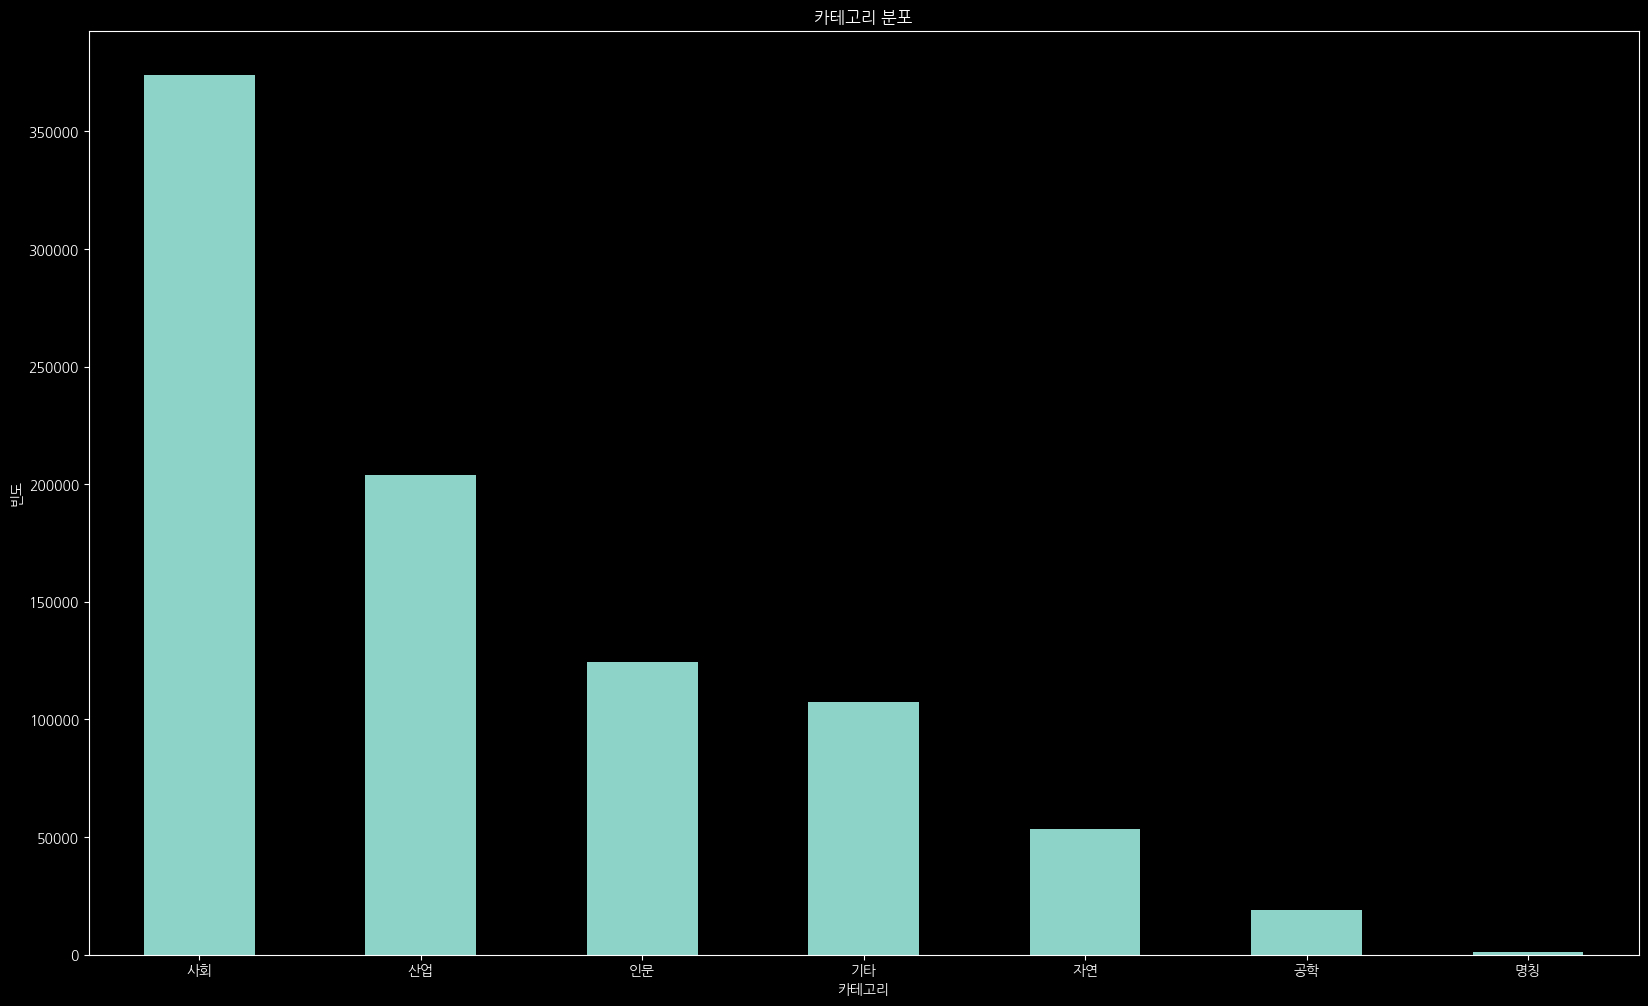

In [42]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(20, 12))
df["category"].value_counts().plot(kind="bar", rot=0)
plt.title("카테고리 분포")
plt.xlabel("카테고리")
plt.ylabel("빈도")
plt.show()

In [45]:
json_str = df.to_json(orient="records", force_ascii=False)

In [ ]:
json_str

## 3. Validation 데이터 처리

In [61]:
import zipfile
import json
from tqdm import tqdm

temp_data = []

with zipfile.ZipFile(
    "./ai_hub_dataset/dataset/data/Validation/02.라벨링데이터/VL.zip", "r"
) as zip_ref:
    file_list = zip_ref.namelist()
    for file in file_list:
        with zip_ref.open(file) as f:
            data_list = json.load(f)
            temp_data.append({file: data_list["data_info"][0]})

In [62]:
# 각 데이터 파일의 구조 확인
temp_data

[{'/SFTlabel.json': {'data_id': '5ecbd119-ec5a-4569-b918-b4131557da14',
   'data_category': {'main': '구어체', 'middle': '기타'},
   'question_type': '생성',
   'question_count': 8,
   'question': '구름을 보고 느끼는 감정에 대한 주제로 시를 써줘.',
   'answer': {'answer_count': 76,
    'contents': '한여름 밤 구름\n야자수 그늘을 찾아 \n또 하나의 이야기를 품고 있는 \n\n구름 하나하나를 살펴보면\n하얀 보송보송한 모습에는 \n순발력과 선명함을 느끼고\n어둠을 깨부수는 해 빛을 담고 있는\n\n시들의 쉼 포옹 속에는 \n구름들이 서로 얽혀\n한의를 품고 있는 용감한 마음을 보이는\n\n구름은 내 마음을 담아\n한없이 넓은 하늘을 향해 향해\n뒤돌아보고 싶은 순간을 남기고\n\n흘러가는 구름 가운데서\n감정이 교차되고\n온기를 전해주는 닿는 손길을 느끼며\n\n한동안 서있던 구름은 사라져가고\n새로운 이야기를 적어나가며\n숨을 쉬는 구름, 이제 떠나야 할 시간이다.'}}},
 {'/RMlabel.json': {'data_id': '941f916a-10ce-4da3-9875-448110f196f7',
   'data_category': {'main': '구어체', 'middle': '기타'},
   'question_type': '생성',
   'question_count': 8,
   'question': 'ETL 프로세스(Extract, Transform, Load)는 어떻게 데이터 이동을 지원하나요?',
   'answer01': {'answer_count': 153,
    'ranking': 1,
    'contents': 'ETL 프로세스는 데이터 이동을 지원하기 위해 세 가지 단계를 수행합니다.\n\n1. Extract(추출): ETL 프로세스는 원본 데이터 소

In [63]:
val_rlhf_qa_datas = []

with zipfile.ZipFile(
    "./ai_hub_dataset/dataset/data/Validation/02.라벨링데이터/VL.zip", "r"
) as zip_ref:
    file_list = zip_ref.namelist()
    print(file_list)
    for file in file_list:
        with zip_ref.open(file) as f:
            data_list = json.load(f)
            try:
                # RM 데이터셋
                qa_data = [
                    {
                        "question": data["question"],
                        "answer": data["answer01"]["contents"],
                        "category": data["data_category"]["middle"],
                    }
                    for data in data_list["data_info"]
                ]
                val_rlhf_qa_datas.extend(qa_data)
            except:
                # SFT 데이터셋
                qa_data = [
                    {
                        "question": data["question"],
                        "answer": data["answer"]["contents"],
                        "category": data["data_category"]["middle"],
                    }
                    for data in data_list["data_info"]
                ]
                val_rlhf_qa_datas.extend(qa_data)

['/SFTlabel.json', '/RMlabel.json']


In [64]:
print(len(val_rlhf_qa_datas))
val_rlhf_qa_datas[0]

4623


{'question': '구름을 보고 느끼는 감정에 대한 주제로 시를 써줘.',
 'answer': '한여름 밤 구름\n야자수 그늘을 찾아 \n또 하나의 이야기를 품고 있는 \n\n구름 하나하나를 살펴보면\n하얀 보송보송한 모습에는 \n순발력과 선명함을 느끼고\n어둠을 깨부수는 해 빛을 담고 있는\n\n시들의 쉼 포옹 속에는 \n구름들이 서로 얽혀\n한의를 품고 있는 용감한 마음을 보이는\n\n구름은 내 마음을 담아\n한없이 넓은 하늘을 향해 향해\n뒤돌아보고 싶은 순간을 남기고\n\n흘러가는 구름 가운데서\n감정이 교차되고\n온기를 전해주는 닿는 손길을 느끼며\n\n한동안 서있던 구름은 사라져가고\n새로운 이야기를 적어나가며\n숨을 쉬는 구름, 이제 떠나야 할 시간이다.',
 'category': '기타'}

In [65]:
val_rlhf_qa_datas[-1]

{'question': '도덕적 딜레마에서 어떻게 최선의 결정을 내릴 수 있는지 서술하시오.',
 'answer': '도덕적 딜레마에서 최선의 결정을 내리기 위해 다음과 같은 절차를 따를 수 있습니다.\n\n1. 상황을 이해하라: 도덕적 딜레마의 세부 사항과 관련된 모든 정보를 수집하고 이해합니다. 각각의 행동 옵션과 그에 따른 결과, 그리고 관련된 도덕적 원칙과 가치에 대한 이해가 필요합니다.\n\n2. 도덕적 원칙과 가치를 고려하라: 도덕적 원칙과 가치를 고려하여 각각의 행동 옵션을 분석합니다. 일반적으로 행동의 결과, 권리와 의무, 공정성, 선(善)과 악(惡)의 원칙 등을 고려합니다.\n\n3. 대안을 고려하라: 다양한 대안을 고려해 보고 각각의 대안이 어떤 결과를 초래할지 예측합니다. 이때, 예상되는 결과의 긍정적인 면과 부정적인 면을 고려해야 합니다.\n\n4. 토론하고 조언을 구하라: 도덕적 딜레마에 대해 다른 사람들과 토론하고 의견을 듣는 것은 중요합니다. 다른 사람들의 관점과 조언을 듣고 내 생각을 확장시킬 수 있습니다.\n\n5. 가치 평가하기: 각각의 대안을 다시 한번 도덕적 가치와 원칙에 대해 평가합니다. 어떤 가치를 우선시할 것인지 고려하고, 다른 가치들과의 충돌을 평가합니다.\n\n6. 결정 내리기: 위의 과정을 거쳐 최선의 결정을 내립니다. 이때, 결정을 내릴 때에는 도덕적 원칙과 가치를 존중하고, 다른 사람들에게 피해를 주지 않는 결정을 선택하는 것이 중요합니다.\n\n7. 결과 평가하기: 결정을 내린 후에는 결과를 평가하고, 그 결정이 예상대로 진행되는지 확인합니다. 그리고 만약 결과가 예상과 다르다면, 다른 선택을 고려하거나 수정하는 것도 필요할 수 있습니다.\n\n도덕적 딜레마에서 최선의 결정을 내리기 위해서는 이러한 절차를 따르면서도 자신의 도덕적 가치와 원칙을 잘 고려해야 합니다. 또한, 다른 사람들의 의견을 존중하고 그들과의 대화를 통해 올바른 결정을 내릴 수 있도록 노력해야 합니다.',
 'category': '인문'}

In [66]:
# 일부 질문과 답변이 동일한 경우가 있으므로 확인
duplicate_qa = []
for qa in val_rlhf_qa_datas:
    if qa["answer"].strip() == qa["question"].strip():
        duplicate_qa.append(qa)
print(len(duplicate_qa))
duplicate_qa[0]

264


{'question': '2007년도쯤 투니버스에서 본 애니 제목을 알려줘.',
 'answer': '2007년도쯤 투니버스에서 본 애니 제목을 알려줘. ',
 'category': '예체능'}

In [67]:
# 원본 데이터에서 중복 제거
val_rlhf_qa_datas = [qa for qa in val_rlhf_qa_datas if qa not in duplicate_qa]
print(len(val_rlhf_qa_datas))
val_rlhf_qa_datas[0]

4359


{'question': '구름을 보고 느끼는 감정에 대한 주제로 시를 써줘.',
 'answer': '한여름 밤 구름\n야자수 그늘을 찾아 \n또 하나의 이야기를 품고 있는 \n\n구름 하나하나를 살펴보면\n하얀 보송보송한 모습에는 \n순발력과 선명함을 느끼고\n어둠을 깨부수는 해 빛을 담고 있는\n\n시들의 쉼 포옹 속에는 \n구름들이 서로 얽혀\n한의를 품고 있는 용감한 마음을 보이는\n\n구름은 내 마음을 담아\n한없이 넓은 하늘을 향해 향해\n뒤돌아보고 싶은 순간을 남기고\n\n흘러가는 구름 가운데서\n감정이 교차되고\n온기를 전해주는 닿는 손길을 느끼며\n\n한동안 서있던 구름은 사라져가고\n새로운 이야기를 적어나가며\n숨을 쉬는 구름, 이제 떠나야 할 시간이다.',
 'category': '기타'}

In [69]:
import pandas as pd

val_df = pd.DataFrame(val_rlhf_qa_datas)

<Axes: xlabel='category'>

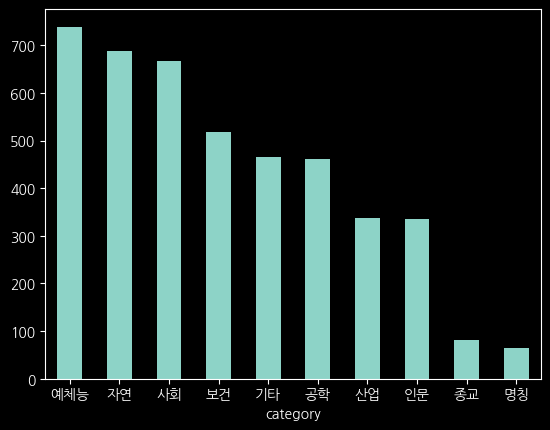

In [71]:
val_df.category.value_counts().plot(kind="bar", rot=0)